In [1]:
import numpy as np 
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Kernal Density Estimate on Udacity

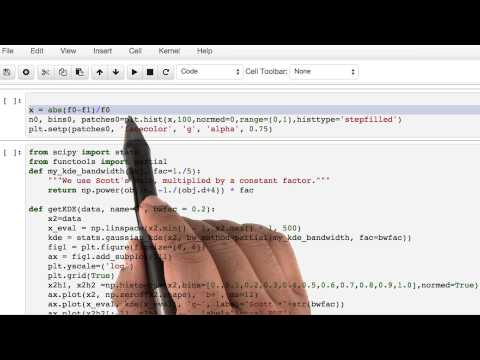

In [22]:
from IPython.display import YouTubeVideo
YouTubeVideo('OErRxuV3eok')

In [6]:
f_IL = pd.read_csv('udacity-kde/Medicare_Data_IL_2012.csv')
f_IL.head(5)

,Unnamed: 0,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,...,hcpcs_description,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,stdev_Medicare_allowed_amt,average_submitted_chrg_amt,stdev_submitted_chrg_amt,average_Medicare_payment_amt,stdev_Medicare_payment_amt
0,8,1003000134,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,...,Pathology examination of tissue using a micros...,226.0,207.0,209.0,11.640000,0.000000,115.0,0.0,8.980442,1.720341
1,9,1003000134,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,...,Pathology examination of tissue using a micros...,6070.0,3624.0,4416.0,37.729960,0.001257,170.0,0.0,28.984504,5.626832
2,10,1003000134,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,...,Preparation of tissue for examination by remov...,13.0,13.0,13.0,12.700000,0.000000,39.0,0.0,7.815385,4.280662
3,11,1003000134,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,...,Special stained specimen slides to identify or...,330.0,231.0,238.0,27.149576,0.005433,88.0,0.0,21.391364,2.646612
4,12,1003000134,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,...,Special stained specimen slides to examine tis...,51.0,46.0,48.0,12.340000,0.000000,68.0,0.0,9.676471,1.368460


In [7]:
f0 = f_IL.average_submitted_chrg_amt.values
f1 = f_IL.average_Medicare_payment_amt.values

In [8]:
f0,f1

(array([ 115.,  170.,   39., ...,  125.,  120.,   74.]),
 array([  8.98044248,  28.98450412,   7.81538462, ...,  69.21448276,
         45.8159375 ,  12.9013    ]))

# make derived feature (X) to the KDE

[None, None]

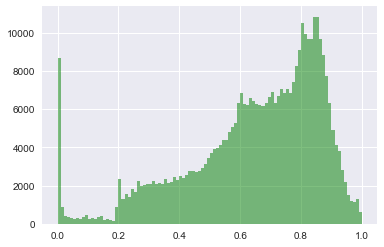

In [17]:
x = abs(f0-f1)/f0 
n0, bins0, patches0=plt.hist(x,100,normed=0,range=(0,1),histtype='stepfilled')
plt.setp(patches0, 'facecolor', 'g', 'alpha', 0.5)

In [11]:
n0,bins0,patches0

(array([  8669.,    897.,    399.,    342.,    305.,    273.,    280.,
           268.,    360.,    479.,    235.,    319.,    242.,    330.,
           420.,    187.,    236.,    173.,    162.,    868.,   2355.,
          1283.,   1581.,   1399.,   1805.,   1652.,   2258.,   1993.,
          2043.,   2074.,   2070.,   2224.,   2089.,   2153.,   2089.,
          2345.,   2150.,   2199.,   2467.,   2297.,   2484.,   2415.,
          2575.,   2761.,   2755.,   2709.,   2747.,   2918.,   3143.,
          3464.,   3705.,   3922.,   3982.,   4097.,   4364.,   4363.,
          4806.,   5061.,   5291.,   6295.,   6836.,   6269.,   6192.,
          6578.,   6436.,   6259.,   6215.,   6150.,   6322.,   6650.,
          6910.,   6336.,   6707.,   7056.,   6846.,   7064.,   6869.,
          7424.,   8277.,   9102.,  10483.,   9910.,   9654.,   9682.,
         10834.,  10811.,   9646.,   8832.,   7715.,   6345.,   4916.,
          4144.,   3826.,   2829.,   2175.,   1512.,   1172.,   1118.,
      

### numpy.linspace

In [28]:
arr = np.linspace(0, 10, 6)
arr

array([  0.,   2.,   4.,   6.,   8.,  10.])

### stats.gaussian_kde
### evaluate bandwidth with np.power

In [3]:
from scipy import stats
from functools import partial
def my_kde_bandwidth(obj, fac=0.2):
    """We use Scott's Rule, multiplied by a constant factor."""
    return np.power(obj.n, -1./(obj.d+4)) * fac

def getKDE(data, name="", bwfac = 0.2):
    x2=data
    x_eval = np.linspace(x2.min() - 1, x2.max() + 1, 500)
    kde = stats.gaussian_kde(x2, bw_method=partial(my_kde_bandwidth, fac=bwfac))
    
    fig1 = plt.figure(figsize=(8, 6))
    ax = fig1.add_subplot(111)
    plt.yscale=('log')
    plt.grid(True)
    x2h1, x2h2 =np.histogram(x2,bins=[0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],normed=True)
    ax.plot(x2, np.zeros(x2.shape), 'b+', ms=12)
    ax.plot(x_eval, kde(x_eval), 'g-', label="Scott *"+str(bwfac))
    ax.plot(x2h2[:-1], x2h1, 'r--', label="Actual PDF")
    ax.set_xlim([-0.5,1.5])
    ax.legend(loc=2)
    ax.set_xlabel('x')
    ax.set_ylabel('Density Estimate')

    return plt

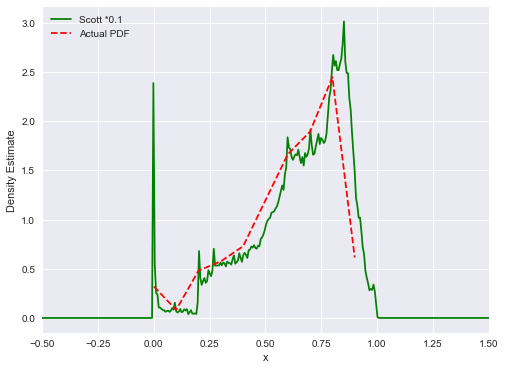

In [10]:
plt.clf()
plt=getKDE(x,"Fractional Diff of Claimed vs Paid",bwfac=0.1)

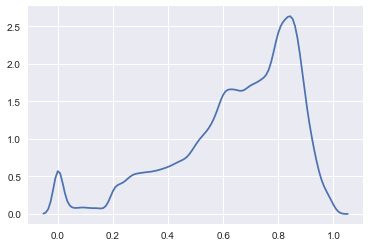

In [77]:
sns.kdeplot(x)

# Single Variable Kernal Density Estimate this cource

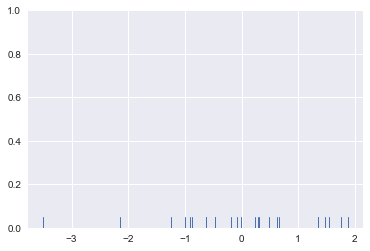

In [35]:
dataset = randn(25)
plt.ylim(0,1)
sns.rugplot(dataset)

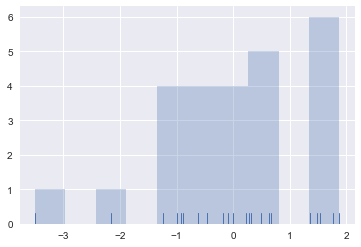

In [36]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

## using sum of all kernel of Xn

In [37]:
x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

# dataset.std() => get dataset stander diviation
bandwidth = (4*dataset.std()**5) / (3*len(dataset)) ** 0.2

(0, 1)

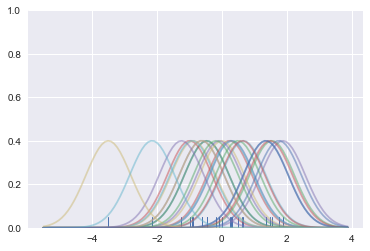

In [48]:
kernel_list = []
sns.rugplot(dataset)
for data_point in dataset:
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,alpha=0.5)
    
plt.ylim(0,1)

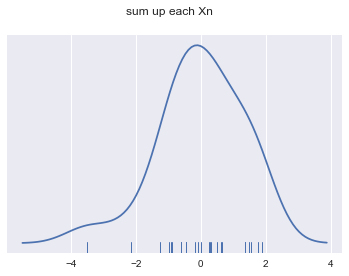

In [49]:
sum_of_kde = np.sum(kernel_list,axis=0)
fig = plt.plot(x_axis,sum_of_kde)
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("sum up each Xn")

## using seaborn

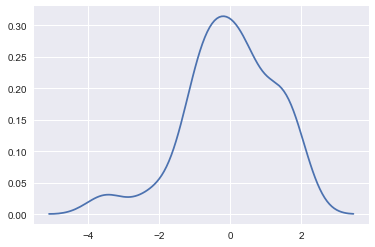

In [51]:
sns.kdeplot(dataset)

# Multi Variable Kernal Density Estimate 

([array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.])],
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.]),
 <a list of 2 Lists of Patches objects>)

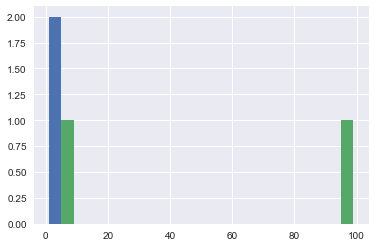

In [107]:
mean = [0,0]
cov = [[1,0],[0,100]]

plt.hist(cov)

([array([   0.,    0.,    0.,    2.,  300.,  692.,    6.,    0.,    0.,    0.]),
  array([   1.,   17.,   49.,  149.,  248.,  259.,  178.,   80.,   14.,    5.])],
 array([-34.87266481, -28.10345846, -21.3342521 , -14.56504575,
         -7.79583939,  -1.02663304,   5.74257331,  12.51177967,
         19.28098602,  26.05019238,  32.81939873]),
 <a list of 2 Lists of Patches objects>)

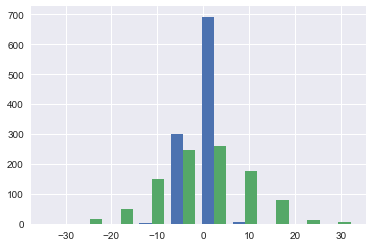

In [85]:
dataset2 = np.random.multivariate_normal(mean,cov,1000)
plt.hist(dataset2)

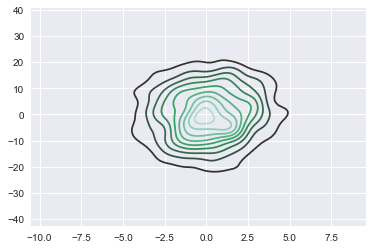

In [86]:
dframe = pd.DataFrame(dataset2)
sns.kdeplot(dframe)

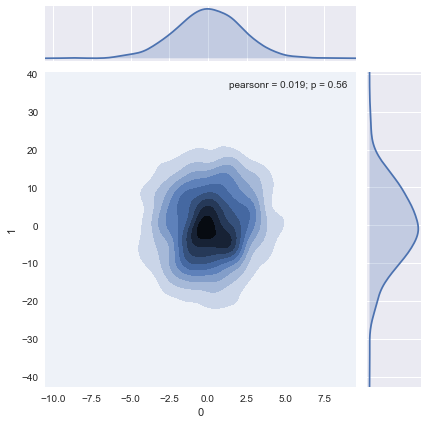

In [111]:
sns.jointplot(0,1,dframe,kind='kde')